# Multiple Plots

When we were working **with a single plot**, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with **multiple plots**, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:
* a **container for all plots** was created (returned as a *Figure* object)
* a **container for the plot** was positioned on a grid (the plot returned as an *Axes* object)
* **visual symbols** were added to the plot (using the Axes methods)

A **figure acts as a container for all of our plots** and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling `pyplot.figure()`:

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

#Prepare dataset
unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

#%matplotlib inline

## Figures and axes

Instead of only calling the pyplot function, we **assigned its return value to a variable (fig)**. After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:
* values on the x-axis and y-axis
* ticks on the x-axis and y-axis
* all visual symbols, such as:
 * markers
 * lines
 * gridlines
 
While **plots are represented using instances of the Axes class**, they're also often referred to as **subplots** in matplotlib. To add a new subplot to an existing figure, use `Figure.add_subplot`. This will **return a new Axes object**, which needs to be assigned to a variable:

In [83]:
fig = plt.figure()


# axes_obj = fig.add_subplot(nrows, ncols, plot_number)

#add two plots to fig
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

This will create **a grid, 2 rows by 1 column, of plots**. Once we're done adding subplots to the figure, we display everything using `plt.show()``:



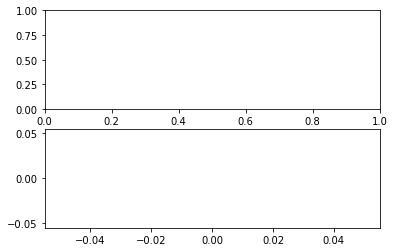

In [84]:
plt.plot()
plt.show()

## Positioning of plots

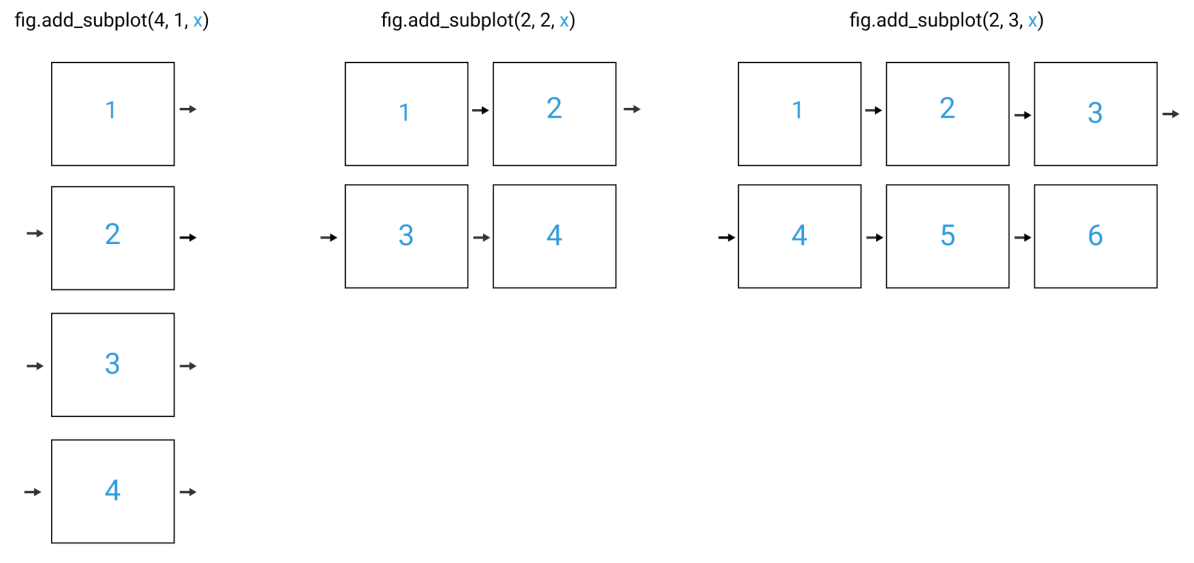

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas **without axes are left blank**:



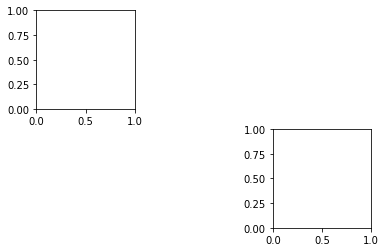

In [85]:
fig2 = plt.figure()
ax3 = fig2.add_subplot(2,3,1)
ax4 = fig2.add_subplot(2,3,6)
plt.show()

## Line Charts in axes objects

To generate a **line chart within an Axes object**, we need to call `Axes.plot()` and pass in the data you want plotted:

In [86]:
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)

Like `pyplot.plot()`, the `Axes.plot()` will **accept any iterable object** for these parameters, including NumPy arrays and pandas Series objects. It will also **generate a line chart by default** from the values passed in. Each time we want to generate a line chart, we need to **call `Axes.plot()`** and pass in the data we want to use in that plot.

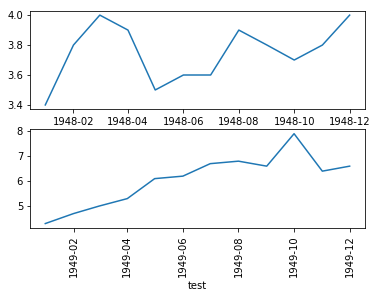

In [91]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate['DATE'][:12],unrate['VALUE'][:12])
plt.xticks(rotation=90)
plt.xlabel('test')


ax2.plot(unrate['DATE'][12:24],unrate['VALUE'][12:24])
plt.xticks(rotation=90)

plt.show()


## Resizing figures

If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the `figsize` parameter when we call `plt.figure()`

fig = plt.figure(figsize=(width, height))

The unit for both width and height **values is inches**. The dpi parameter, or dots per inch, and the figsize parameter determine how much space on your display a plot takes up.

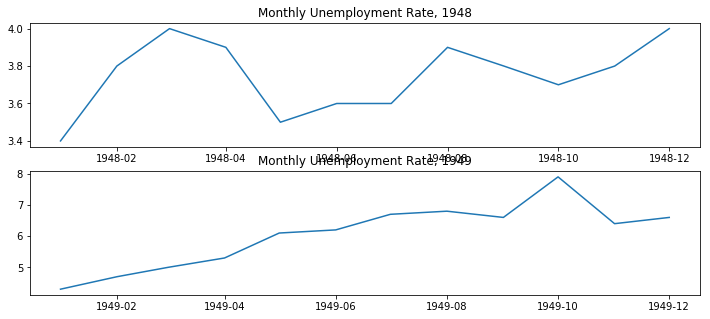

In [93]:
fig = plt.figure(figsize=(12,5)) #setting width and height to 12 / 5
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

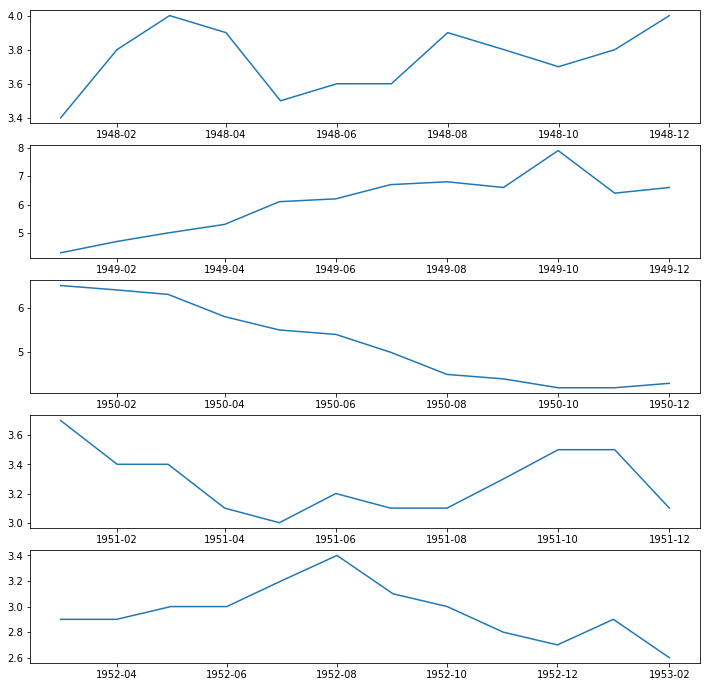

In [94]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(5,1,1)
ax1.plot(unrate['DATE'][0:12],unrate['VALUE'][0:12])

ax2 = fig.add_subplot(5,1,2)
ax2.plot(unrate['DATE'][12:24],unrate['VALUE'][12:24])

ax3 = fig.add_subplot(5,1,3)
ax3.plot(unrate['DATE'][24:36],unrate['VALUE'][24:36])

ax4 = fig.add_subplot(5,1,4)
ax4.plot(unrate['DATE'][36:48],unrate['VALUE'][36:48])

ax5 = fig.add_subplot(5,1,5)
ax5.plot(unrate['DATE'][50:62],unrate['VALUE'][50:62])

plt.show()
